In [168]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

# Mistery Function

('len(files)', 42)
('len(files)', 27)
('len(files)', 29)


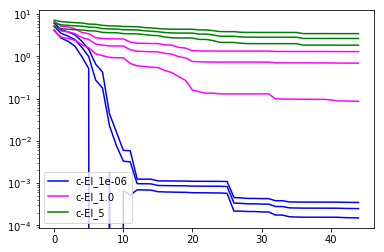

In [217]:
s=0
color=["blue", "magenta", "green"]
mistery_stats_bnch = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0, 5]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min(data["Opportunity_cost"].values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
    
        
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + 15*MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
        
    mean_values_mistery_bnch = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results))
    print("len(files)",len(filered_results))

    mistery_stats_bnch["noise_lvl"].append(noise)
    mistery_stats_bnch["mean"].append(mean_values_mistery_bnch)
    mistery_stats_bnch["MSE"].append(MSE_mistery_bnch)
    
    plt.plot(mean_values_mistery_bnch, color=color[s],label="c-EI_"+str(noise))
    plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color[s])
    plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color[s])
    s=s+1
plt.yscale("log")
plt.legend()
plt.show()

('noise', 1e-06)
('idx', 0)


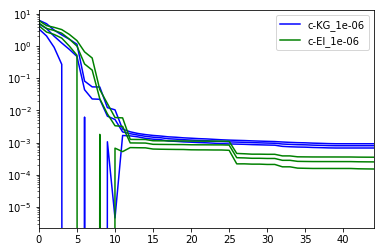

('noise', 1.0)
('idx', 1)


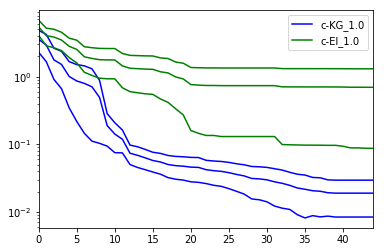

In [220]:
s=0
color=["blue", "blue"]
color_bnch = ["green", "green"]
mistery_stats = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_noisy_experiments_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min((data["Opportunity_cost"][10:]).values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
        

    
    
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
        
    mean_values_mistery = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery = 1.90*std_values/np.sqrt(len(files))
    
    mistery_stats["noise_lvl"].append(noise)
    mistery_stats["mean"].append(mean_values_mistery )
    mistery_stats["MSE"].append(MSE_mistery)
    
    plt.plot(mean_values_mistery, color="blue",label="c-KG_"+str(noise))
    plt.plot(mean_values_mistery+MSE_mistery, color="blue")
    plt.plot(mean_values_mistery-MSE_mistery, color="blue")
    
    print("noise", noise)
    idx = np.array(mistery_stats_bnch["noise_lvl"]).reshape(-1)==noise
    idx=np.array(range(0,len(idx)))[idx][0]
    print("idx", idx)
    plt.plot(mistery_stats_bnch["mean"][idx], color="green",label="c-EI_"+str(noise))
    plt.plot(mistery_stats_bnch["mean"][idx]+mistery_stats_bnch["MSE"][idx], color="green")
    plt.plot(mistery_stats_bnch["mean"][idx]-mistery_stats_bnch["MSE"][idx], color="green")
    
    s=s+1
    plt.yscale("log")
    plt.legend()
    plt.xlim(0,44)
    plt.show()

# TEST FUNCTION 2

('len(filered_results)', 88)
('len(filered_results)', 21)
('len(filered_results)', 17)
('len(filered_results)', 17)


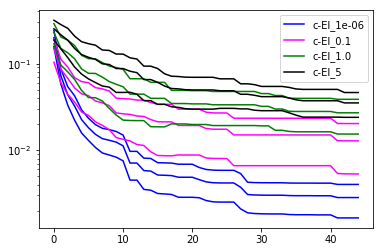

In [242]:
s=0
color=["blue", "magenta", "green", "black"]
test_f_2_stats_bnch = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 0.1, 1.0, 5]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min(data["Opportunity_cost"].values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))

    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
    
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results))
    print("len(filered_results)",len(filered_results))
    test_f_2_stats_bnch["noise_lvl"].append(noise)
    test_f_2_stats_bnch["mean"].append(mean_values_mistery_bnch)
    test_f_2_stats_bnch["MSE"].append(MSE_mistery_bnch)
    
    plt.plot(mean_values_mistery_bnch, color=color[s],label="c-EI_"+str(noise))
    plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color[s])
    plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color[s])
    s=s+1
plt.yscale("log")
plt.legend()
plt.show()

('noise', 1e-06)
('idx', 0)


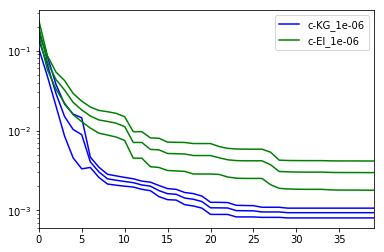

('noise', 1.0)
('idx', 1)


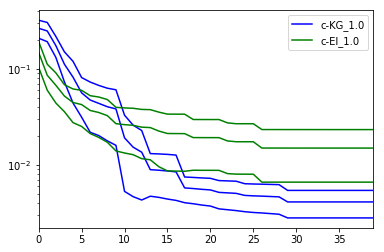

In [243]:
s=0
color=["blue", "blue"]
color_bnch = ["green", "green"]
test_function_2 = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_noisy_experiments"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min((data["Opportunity_cost"][10:]).values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
        

    
    
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
        
    mean_values_mistery = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery = 1.90*std_values/np.sqrt(len(files))
    
    test_function_2["noise_lvl"].append(noise)
    test_function_2["mean"].append(mean_values_mistery )
    test_function_2["MSE"].append(MSE_mistery)
    
    plt.plot(mean_values_mistery, color="blue",label="c-KG_"+str(noise))
    plt.plot(mean_values_mistery+MSE_mistery, color="blue")
    plt.plot(mean_values_mistery-MSE_mistery, color="blue")
    
    print("noise", noise)
    idx = np.array(mistery_stats_bnch["noise_lvl"]).reshape(-1)==noise
    idx=np.array(range(0,len(idx)))[idx][0]
    print("idx", idx)
    plt.plot(test_f_2_stats_bnch["mean"][idx], color="green",label="c-EI_"+str(noise))
    plt.plot(test_f_2_stats_bnch["mean"][idx]+test_f_2_stats_bnch["MSE"][idx], color="green")
    plt.plot(test_f_2_stats_bnch["mean"][idx]-test_f_2_stats_bnch["MSE"][idx], color="green")
    
    s=s+1
    plt.yscale("log")
    plt.legend()
    plt.xlim(0,39)
    plt.show()

# New Brannin Function

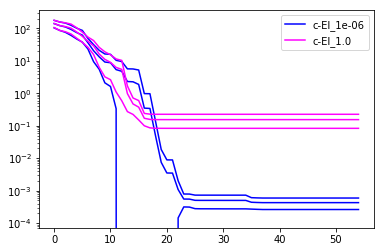

In [96]:
s=0
color=["blue", "magenta", "green", "black"]
new_branin_bnch = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch_extended_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min(data["Opportunity_cost"][10:].values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))

    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    new_branin_bnch["noise_lvl"].append(noise)
    new_branin_bnch["mean"].append(mean_values_mistery_bnch )
    new_branin_bnch["MSE"].append(MSE_mistery_bnch)
    
    plt.plot(mean_values_mistery_bnch, color=color[s],label="c-EI_"+str(noise))
    plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color[s])
    plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color[s])
    s=s+1
plt.yscale("log")
plt.legend()
plt.show()

('noise', 1e-06)


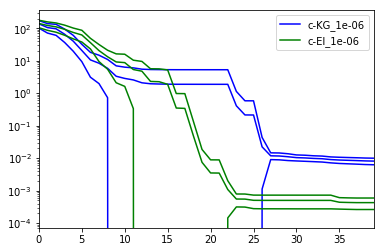

('noise', 1.0)


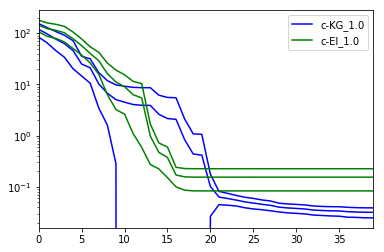

In [97]:
s=0
color=["blue", "blue"]
color_bnch = ["green", "green"]
new_branin = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_noisy_experiments_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min((data["Opportunity_cost"][10:]).values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
        

    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
        
    mean_values_mistery = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery = 1.90*std_values/np.sqrt(len(files))
    
    new_branin["noise_lvl"].append(noise)
    new_branin["mean"].append(mean_values_mistery )
    new_branin["MSE"].append(MSE_mistery)
    
    plt.plot(mean_values_mistery, color="blue",label="c-KG_"+str(noise))
    plt.plot(mean_values_mistery+MSE_mistery, color="blue")
    plt.plot(mean_values_mistery-MSE_mistery, color="blue")
    
    print("noise", noise)
    idx = np.array(mistery_stats_bnch["noise_lvl"]).reshape(-1)==noise
    idx=np.array(range(0,len(idx)))[idx][0]

    plt.plot(new_branin_bnch["mean"][idx], color="green",label="c-EI_"+str(noise))
    plt.plot(new_branin_bnch["mean"][idx]+new_branin_bnch["MSE"][idx], color="green")
    plt.plot(new_branin_bnch["mean"][idx]-new_branin_bnch["MSE"][idx], color="green")
    
    s=s+1
    plt.yscale("log")
    plt.legend()
    plt.xlim(0,39)
    plt.show()

In [140]:
Y_true = [np.array([34.2210706  ,32.77934731 ,15.42950884 , 5.60469761 ,25.96545694 ,38.54346612,
  31.81187827 ,36.10938234 ,30.90883099 ,16.6151869 , 38.87095475])]

C_true= [[ 0.68082728 , 0.38268256 , 0.24633132 ,-0.10709466 , 0.38268279, -0.57065075,0.77876527  ,0.98417984 ,-0.57065114 ,-0.034285 ,  -0.45826313],
        [ 0.68082728 , 0.38268256 , 0.24633132 ,-0.10709466 , 0.38268279, -0.57065075,0.77876527  ,0.98417984 ,-0.57065114 ,-0.034285 ,  -0.45826313]]

In [153]:
a = np.array([[0.15  ,     0.55      ],
 [0.35    ,   0.35      ],
 [0.45     ,  0.95      ],
 [0.95      , 0.85      ],
 [0.75      , 0.75      ],
 [0.65      , 0.45      ],
 [0.55      , 0.65      ],
 [0.05      , 0.25      ],
 [0.25      , 0.05      ],
 [0.85      , 0.15      ],
 [0.05969275, 0.64757594]])

In [154]:
b = np.array([[2,3]])

In [156]:
np.concatenate((a,b))

array([[0.15      , 0.55      ],
       [0.35      , 0.35      ],
       [0.45      , 0.95      ],
       [0.95      , 0.85      ],
       [0.75      , 0.75      ],
       [0.65      , 0.45      ],
       [0.55      , 0.65      ],
       [0.05      , 0.25      ],
       [0.25      , 0.05      ],
       [0.85      , 0.15      ],
       [0.05969275, 0.64757594],
       [2.        , 3.        ]])

In [233]:
raise Exception('I know Python!')

Exception: I know Python!

In [234]:
a ="pene"
a=="pene"

True

In [250]:
max_ = 100
lasts = 50

for i in range(max_):
    print(i)
    if i > max_-lasts:
            print("pene")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
pene
52
pene
53
pene
54
pene
55
pene
56
pene
57
pene
58
pene
59
pene
60
pene
61
pene
62
pene
63
pene
64
pene
65
pene
66
pene
67
pene
68
pene
69
pene
70
pene
71
pene
72
pene
73
pene
74
pene
75
pene
76
pene
77
pene
78
pene
79
pene
80
pene
81
pene
82
pene
83
pene
84
pene
85
pene
86
pene
87
pene
88
pene
89
pene
90
pene
91
pene
92
pene
93
pene
94
pene
95
pene
96
pene
97
pene
98
pene
99
pene


In [264]:
simulation_flag = True
query_flag = True

In [278]:
class pene():
    def __init__(self):
        self.val = np.array([3])
    
    def func(self):
        self.val= np.array([6])
        
class pene2():
    def __init__(self, func):
        self.inner_nana = func.val
        print("self.inner_nana",self.inner_nana)
        func.func()
        print("self.inner_nana",self.inner_nana)


In [279]:
f = pene()
pene2(f)

('self.inner_nana', array([3]))
('self.inner_nana', array([3]))


<__main__.pene2 instance at 0x7fcb89ba0488>

In [271]:
f.val

3